In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np
import gdown
import matplotlib

In [ ]:
color = sns.color_palette()
sns.set_style('darkgrid')
sns.set_palette('deep')
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

sns.__version__

'0.12.2'

In [ ]:
import warnings

def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
warnings.filterwarnings("ignore", category=DeprecationWarning)
print('Deprecation warning will be ignored!')

Deprecation warning will be ignored!


載入數據

In [ ]:
# https://drive.google.com/file/d/13TZFmK2WBP0-og51ls6y3OF9uAd978gV/view?usp=sharing

url = 'https://drive.google.com/uc?id=13TZFmK2WBP0-og51ls6y3OF9uAd978gV'
output = 'file.csv'
gdown.download(url, output, quiet=False)

# 讀取CSV檔案
df = pd.read_csv('file.csv')
df.shape

Downloading...
From: https://drive.google.com/uc?id=13TZFmK2WBP0-og51ls6y3OF9uAd978gV
To: /content/file.csv
100%|██████████| 111M/111M [00:01<00:00, 82.1MB/s]


(518468, 17)

# 上傳字體

## gdown法：不用事先上傳，直接就能執行

In [ ]:
# 安裝 gdown 套件（如果尚未安裝）
# !pip install gdown
# import shutil

# 下載文件並將其命名為 NotoSansCJKtc-Regular.otf
!gdown --id 1SzYNw0FDz3tO_t2uJsGtldXrH7n5yzCW --output /content/NotoSansCJKtc-Regular.otf

# shutil.move("/content/NotoSansCJKtc-Regular.otf", "/content/drive/MyDrive/raw data/fonts/NotoSansCJKtc-Regular.otf")

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1SzYNw0FDz3tO_t2uJsGtldXrH7n5yzCW
To: /content/NotoSansCJKtc-Regular.otf
100% 16.4M/16.4M [00:00<00:00, 38.2MB/s]


In [ ]:
import shutil

shutil.move("/content/NotoSansCJKtc-Regular.otf", "/content/NotoSansCJKtc-Regular.otf")

'/content/NotoSansCJKtc-Regular.otf'

In [ ]:
font_path = '/content/NotoSansCJKtc-Regular.otf'

font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Noto Sans CJK TC'

# 查看發票日期範圍

In [ ]:
df.sort_values("inv_date").head(1)

,Unnamed: 0,inv_num,channel,item_name,unit_price,quantity,amount,seller_name,gender,inv_date,inv_time,uuid,age,categ,year,month,day_of_the_week
518467,657656,ZD04811614,零售‧經銷‧一般日用,三得利美味梅酒2L,899,1,899,台灣泛亞零售管理顧問股份有限公司忠孝新生分公司,male,2022-04-01,15:06:00,c0c4181e3c2eee80,NaN,梅酒,2022,4,5


In [ ]:
df.sort_values("inv_date").tail(1)

,Unnamed: 0,inv_num,channel,item_name,unit_price,quantity,amount,seller_name,gender,inv_date,inv_time,uuid,age,categ,year,month,day_of_the_week
0,2,TP08796949,菸酒,ABS伏特加原味750ml,399,2,798,佳賀板新有限公司,male,2023-10-29,12:57:56,DDD94689-8D18-403E-AB7D-97F59B9C6EDA,25.000,伏特加,2023,10,7


## Overview
* **消費金額的數目平均與中位數(分布) groupby 月份**：呈現不同時間的消費情形，可察看趨勢
* **消費金額的數目平均與中位數(分布) groupby 月份**：呈現不同時間的消費情形，可察看趨勢

# 定義問題
## **目標受眾**：廣告代理商及烈酒經銷商
## **目標**：提供烈酒供應商、廣告代理商清楚易懂且 actionable 的潛在策略建議
## **背景知識**
### 廣告代理商是什麼？
協助品牌和企業制定和執行廣告策略的公司或組織，其主要任務是讓品牌的資訊能夠有效且針對性地傳達給目標受眾。需要：
* 分析市場趨勢
* 制定廣告策略
* 思考廣告投放方式

以實現客戶的商業目標。
廣告代理商對以下主題感興趣：
1. 市場趨勢：對市場變化和趨勢的了解，包括消費者行為和產業發展
2. 創意和文化趨勢：對創意表現和文化趨勢的關注，以創造引人注目的廣告內容
3. 最新的媒體和技術：對新媒體和技術的了解，以選擇最適合的廣告渠道

### 烈酒經銷商對什麼資訊感興趣？
1. 市場趨勢與消費模式變化：了解當前市場趨勢、消費者喜好變化，以調整銷售策略
2. 產品資訊與品牌推廣：對於不同烈酒品牌的產品特色、市場定位和品牌行銷方式有興趣
3. 銷售通路和消費行為：關注不同銷售通路的效益，包括日夜間通路的差異和消費者的購買行為

### 我們可以給目標受眾的訊息
* 得知烈酒資訊方式
* 定價策略
* 促銷使用時機：分析淡旺季：圓餅圖，
 1. groupby month, brand
 2. 看平日假日
* 行銷手法與消費模式

---


## Section 1
*每個月分的抽樣比例不同！！！*

我想要讓發票數據只有一年就好(不然像10月是受疫情波及的2022年10月和今年10月兩者平均，但11月就只有2022年11月，兩者不一，可能導致具誤導性的結果)


In [ ]:
# Dangerous! It will change the whole df

start_date = '2022-10-30'
end_date = '2023-10-29'

df = df[(df['inv_date'] >= start_date) & (df['inv_date'] <= end_date)]

In [ ]:
df.loc[:,["unit_price",	"quantity",	"amount"]].describe()

,unit_price,quantity,amount
count,340824.000,340824.000,340824.000
mean,389.431,1.251,491.778
std,481.380,1.314,989.369
min,20.000,1.000,20.000
25%,150.000,1.000,160.000
50%,275.000,1.000,299.000
75%,450.000,1.000,519.000
max,29495.000,93.000,139407.000


我想到，會不會**quantity多的就代表示酒吧買的**，所以是on-trade？

---


### 針對amount。小結 你可能會意外的point：
* 11月無顯著高峰，原本以為雙11會有影響
* 高峰出現在1月，推測天氣冷能推動酒類銷售

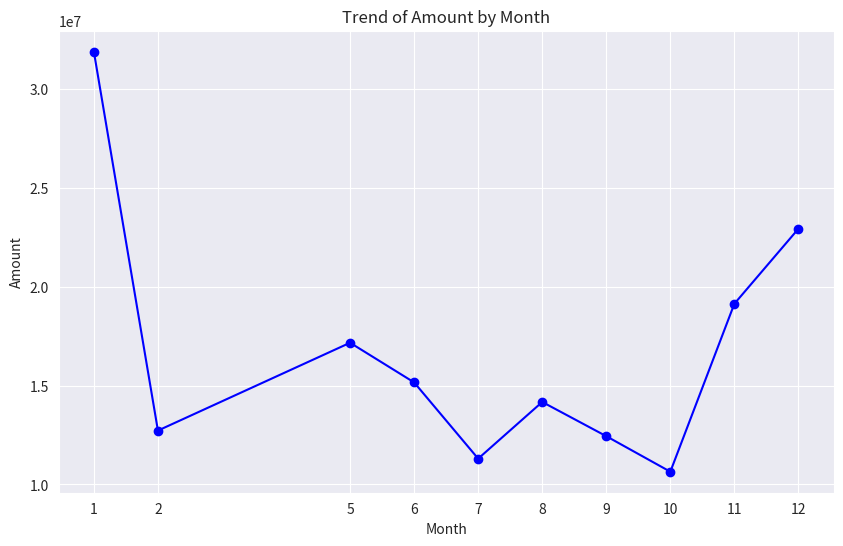

In [ ]:
dfgrouped = df.groupby('month').agg({"amount":"sum","unit_price":"mean"})

plt.figure(figsize=(10, 6))
plt.plot(dfgrouped.index, dfgrouped['amount'], marker='o', linestyle='-', color='b')

plt.title('Trend of Amount by Month')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(dfgrouped.index)  # 设置 x 轴刻度为 'month' 的索引值
plt.grid(True)
plt.show()

Trend of Amount by Month


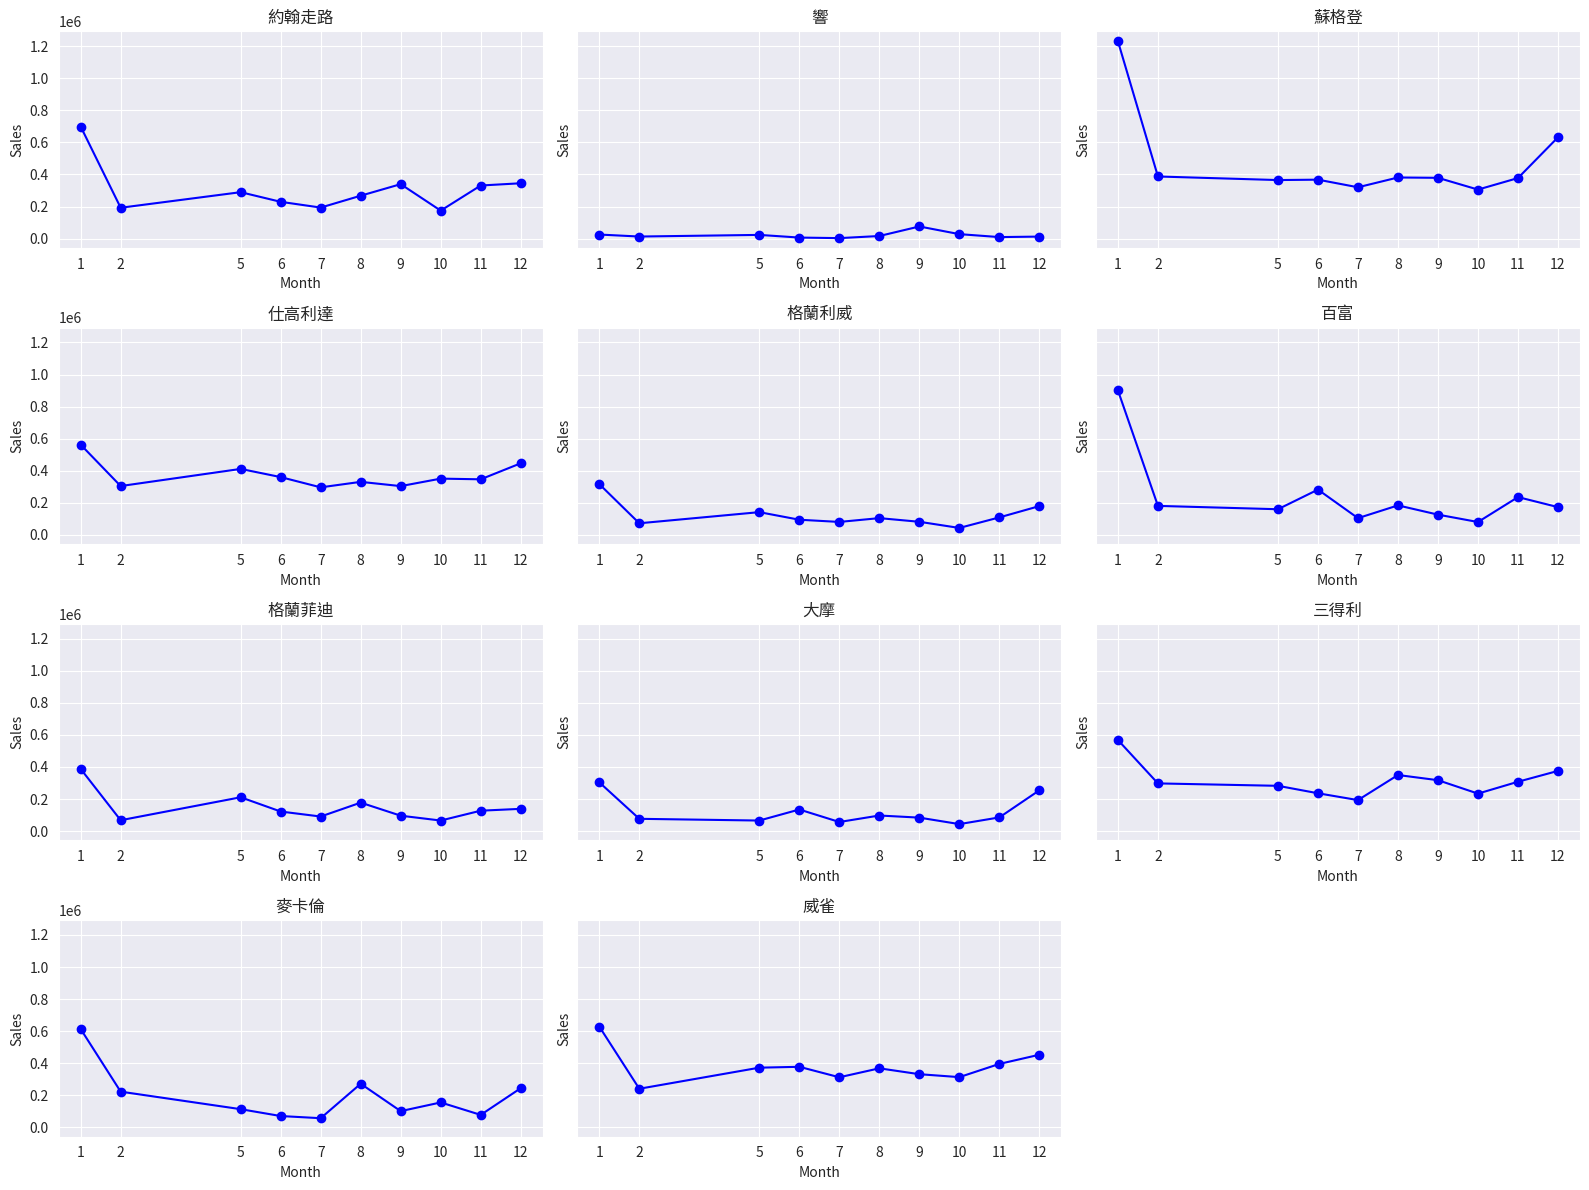

In [ ]:
# 分析不同月分個品牌的銷售狀況
brand_name = ["約翰走路","響","蘇格登","仕高利達","格蘭利威","百富","格蘭菲迪","大摩","三得利",'麥卡倫',"威雀"]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 12), sharey=True)
axes = axes.flatten()

print('Trend of Amount by Month')

for i, brand in enumerate(brand_name):
    filtered_df = df[df['item_name'].str.contains(brand, na=False)].groupby('month').agg({"amount":"sum","unit_price":"mean"})
    axes[i].plot(filtered_df.index, filtered_df['amount'], marker='o', linestyle='-', color='b')
    axes[i].set_title(f"{brand}")
    axes[i].set_xticks(filtered_df.index)  # 设置 x 轴刻度为 'month' 的索引值
    axes[i].grid(True)
    axes[i].set_xlabel("Month")
    axes[i].set_ylabel("Sales")
    # axes[i].set_ylim(0, 7000)  # 设置y轴范围

# 删除多余的子图框架
for i in range(len(brand_name), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Trend of Amount by Week of the day


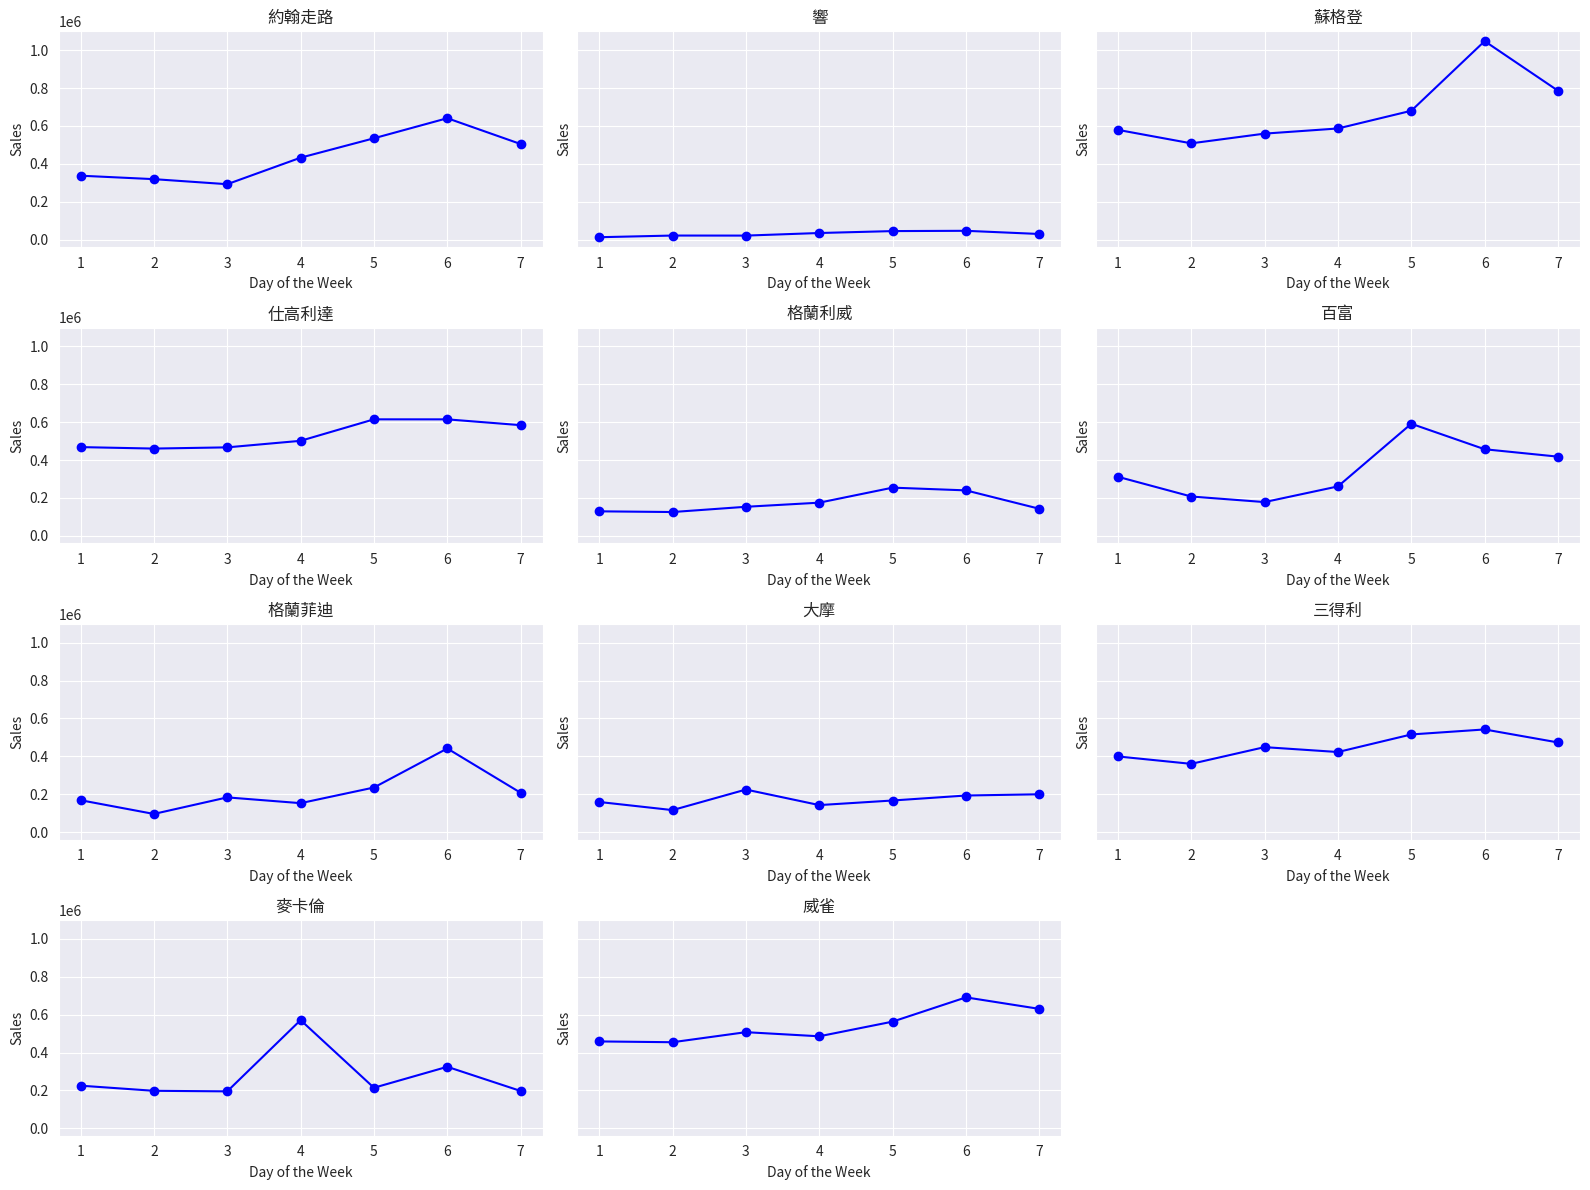

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 12), sharey=True)
axes = axes.flatten()

print('Trend of Amount by Week of the day')

for i, brand in enumerate(brand_name):
    filtered_df = df[df['item_name'].str.contains(brand, na=False)].groupby('day_of_the_week').agg({"amount":"sum","unit_price":"mean"})
    axes[i].plot(filtered_df.index, filtered_df['amount'], marker='o', linestyle='-', color='b')
    axes[i].set_title(f"{brand}")
    axes[i].set_xticks(filtered_df.index)  # 设置 x 轴刻度为 'day_of_the_week'
    axes[i].grid(True)
    axes[i].set_xlabel("Day of the Week")
    axes[i].set_ylabel("Sales")
    # axes[i].set_ylim(0, 7000)  # 设置y轴范围

# 删除多余的子图框架
for i in range(len(brand_name), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

---
### 針對price
* 天氣冷的影響
 * 個別品牌在1月無明顯高峰，但整體看卻有明顯高峰，可能是因為比例問題，比如說我在天氣冷會多買整體就比較高單價的品牌，關於個品牌單價定位請見[待補上連結]()

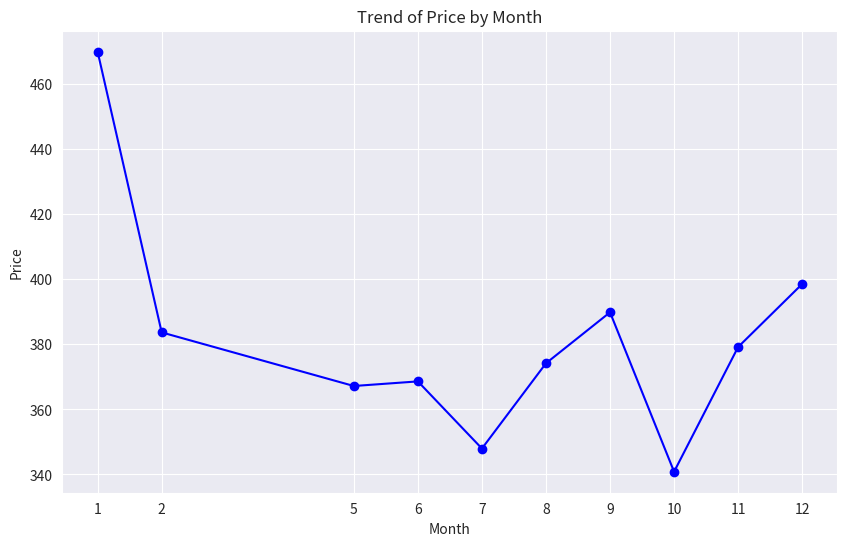

In [ ]:
dfgrouped = df.groupby('month').agg({"amount":"sum","unit_price":"mean"})

plt.figure(figsize=(10, 6))
plt.plot(dfgrouped.index, dfgrouped['unit_price'], marker='o', linestyle='-', color='b')

plt.title('Trend of Price by Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(dfgrouped.index)  # 设置 x 轴刻度为 'month' 的索引值
plt.grid(True)
plt.show()

Trend of Unit price by Week of the day


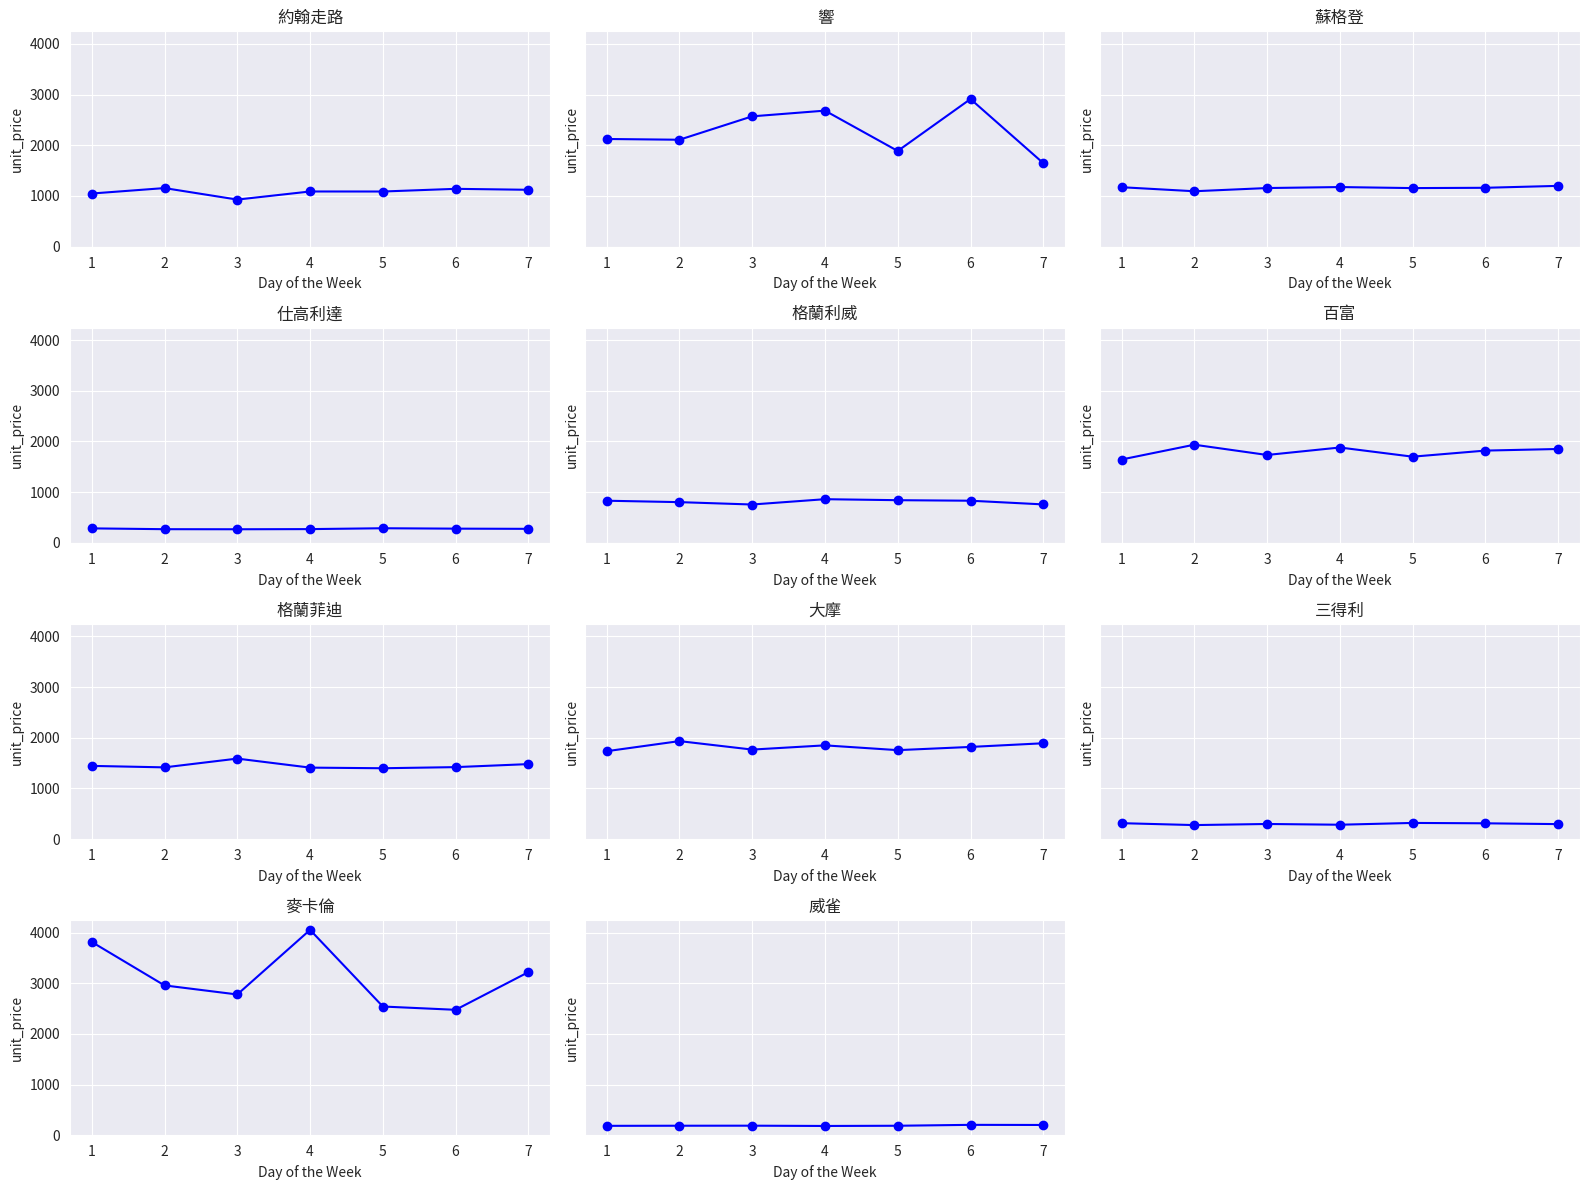

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 12), sharey=True)
axes = axes.flatten()

print('Trend of Unit price by Week of the day')

for i, brand in enumerate(brand_name):
    filtered_df = df[df['item_name'].str.contains(brand, na=False)].groupby('day_of_the_week').agg({"amount":"sum","unit_price":"mean"})
    axes[i].plot(filtered_df.index, filtered_df['unit_price'], marker='o', linestyle='-', color='b')
    axes[i].set_title(f"{brand}")
    axes[i].set_xticks(filtered_df.index)  # 设置 x 轴刻度为 'day_of_the_week'
    axes[i].grid(True)
    axes[i].set_xlabel("Day of the Week")
    axes[i].set_ylabel("unit_price")
    # axes[i].set_ylim(0, 7000)  # 设置y轴范围

# 删除多余的子图框架
for i in range(len(brand_name), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Section 2 ：高單價與低單價的威士忌客群

### 銷量上無顯著相關

In [ ]:
dflowpriceV = df[(df['unit_price']>df['unit_price'].quantile(0.25)) & (df['categ'] == "威士忌")]
dflowpriceV.head()

,Unnamed: 0,inv_num,channel,item_name,unit_price,quantity,amount,seller_name,gender,inv_date,inv_time,uuid,age,categ,year,month,day_of_the_week
11,16,SH56016712,便利商店,VAT69蘇格蘭威士忌750ml,279,1,279,三商行股份有限公司北投振華分公司,male,2023-10-29,12:49:02,28ABC1B8-CD8D-47E2-A24D-5E7C8FAF8D7D,30.000,威士忌,2023,10,7
13,20,SH71581373,便利商店,英國蘇格蘭理查森威士忌700ml,215,12,2580,三商行股份有限公司大安樂業分公司,NaN,2023-10-29,11:19:32,8495b1d8a3094d1a,NaN,威士忌,2023,10,7
14,21,SH71581375,便利商店,英國蘇格蘭理查森威士忌700ml,194,2,388,三商行股份有限公司大安樂業分公司,NaN,2023-10-29,11:25:53,8495b1d8a3094d1a,NaN,威士忌,2023,10,7
16,24,SY21950422,便利商店,百齡罈紅璽蘇格蘭威士忌,155,2,310,全家便利商店（股）公司景文分公司,female,2023-10-29,10:12:42,54b5adc704edb155,58.000,威士忌,2023,10,7
18,26,SH88380049,便利商店,英國蘇格蘭理查森威士忌700ml,194,2,388,三商家購股份有限公司台南北成分公司,female,2023-10-29,10:08:11,4B15BAAE-0FE0-4DFA-9C2A-A8B2F0D2075D,50.000,威士忌,2023,10,7


In [ ]:
dfhighpriceV = df[(df['unit_price']>df['unit_price'].quantile(0.75)) & (df['categ'] == "威士忌")]
dfhighpriceV.head()

,Unnamed: 0,inv_num,channel,item_name,unit_price,quantity,amount,seller_name,gender,inv_date,inv_time,uuid,age,categ,year,month,day_of_the_week
31,39,SY00851603,便利商店,查爾斯王蘇格蘭威士忌,499,2,998,全家便利商店股份有限公司屏東福光分公司,female,2023-10-29,12:56:32,ee89cd2650d359f1,40.000,威士忌,2023,10,7
51,62,SX74836598,便利商店,仕高利達金牌蘇格蘭威士忌,480,1,480,全家便利商店股份有限公司新北市第六二二門市部,female,2023-10-29,11:36:38,30d82a5d9701e020,NaN,威士忌,2023,10,7
84,99,SE89388658,百貨公司‧購物中心,465752@銀璽12年單一高地純麥威士忌700M,1150,1,1150,遠百企業股份有限公司台中復興分公司,NaN,2023-10-29,13:16:04,f11f4e1f88fe5fe2,NaN,威士忌,2023,10,7
91,123,SH63346525,便利商店,蘇格登12年亞洲版單一麥芽蘇格蘭威士忌700m,1289,1,1289,三商行股份有限公司新店新烏分公司,male,2023-10-29,09:56:49,702f84efb00023ba,60.000,威士忌,2023,10,7
95,128,SM71923196,便利商店,仕高利達金牌蘇格蘭威士忌700ml,480,1,480,來來超商股份有限公司第４７８分公司,female,2023-10-29,07:55:19,CDCEDFBD-78F1-482E-9374-FF45615186E0,35.000,威士忌,2023,10,7


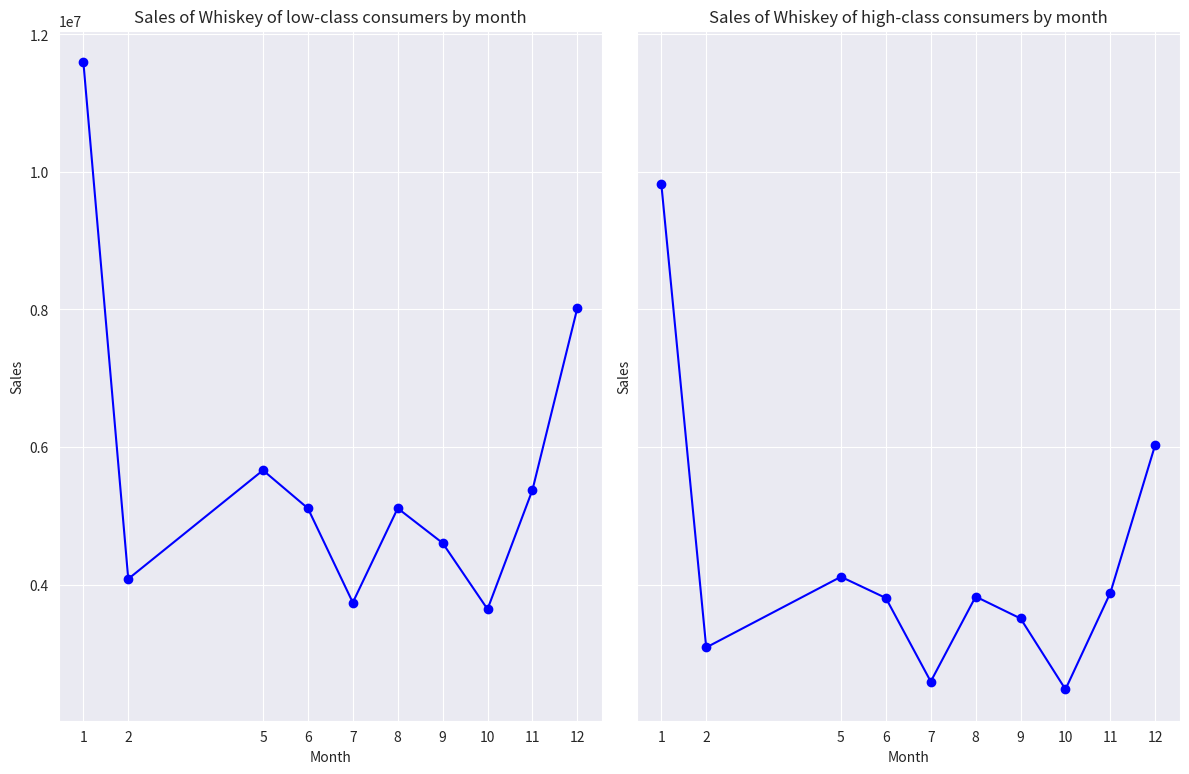

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
axes = axes.flatten()

filtered_df1 = dflowpriceV.groupby('month').agg({"amount":"sum","unit_price":"mean"})
axes[0].plot(filtered_df1.index, filtered_df1['amount'], marker='o', linestyle='-', color='b')
axes[0].set_title("Sales of Whiskey of low-class consumers by month")
axes[0].set_xticks(filtered_df1.index)  # 设置 x 轴刻度为 'month' 的索引值
axes[0].grid(True)
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Sales")


filtered_df = dfhighpriceV.groupby('month').agg({"amount":"sum","unit_price":"mean"})
axes[1].plot(filtered_df.index, filtered_df['amount'], marker='o', linestyle='-', color='b')
axes[1].set_title("Sales of Whiskey of high-class consumers by month")
axes[1].set_xticks(filtered_df.index)  # 设置 x 轴刻度为 'month' 的索引值
axes[1].grid(True)
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Sales")


plt.tight_layout()
plt.show()

### 平均價格與數量：
* 高單價客群11月銷售額偏低，單價也沒有特別高，但每筆交易平均購買數量卻偏高，不知道原因，極端值的影響？

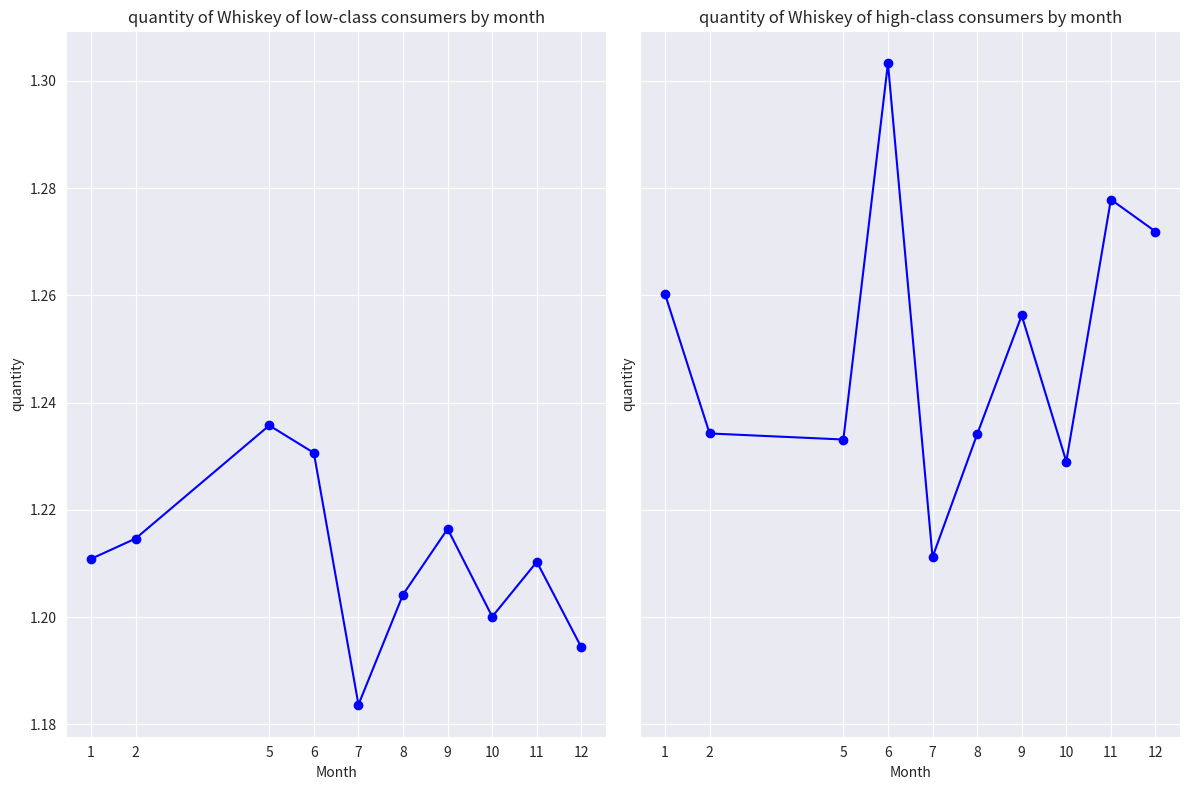

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
axes = axes.flatten()

filtered_df1 = dflowpriceV.groupby('month').agg({"amount":"sum","unit_price":"mean","quantity":"mean"})
axes[0].plot(filtered_df1.index, filtered_df1['quantity'], marker='o', linestyle='-', color='b')
axes[0].set_title("quantity of Whiskey of low-class consumers by month")
axes[0].set_xticks(filtered_df1.index)  # 设置 x 轴刻度为 'month' 的索引值
axes[0].grid(True)
axes[0].set_xlabel("Month")
axes[0].set_ylabel("quantity")


filtered_df = dfhighpriceV.groupby('month').agg({"amount":"sum","unit_price":"mean","quantity":"mean"})
axes[1].plot(filtered_df.index, filtered_df['quantity'], marker='o', linestyle='-', color='b')
axes[1].set_title("quantity of Whiskey of high-class consumers by month")
axes[1].set_xticks(filtered_df.index)  # 设置 x 轴刻度为 'month' 的索引值
axes[1].grid(True)
axes[1].set_xlabel("Month")
axes[1].set_ylabel("quantity")


plt.tight_layout()
plt.show()

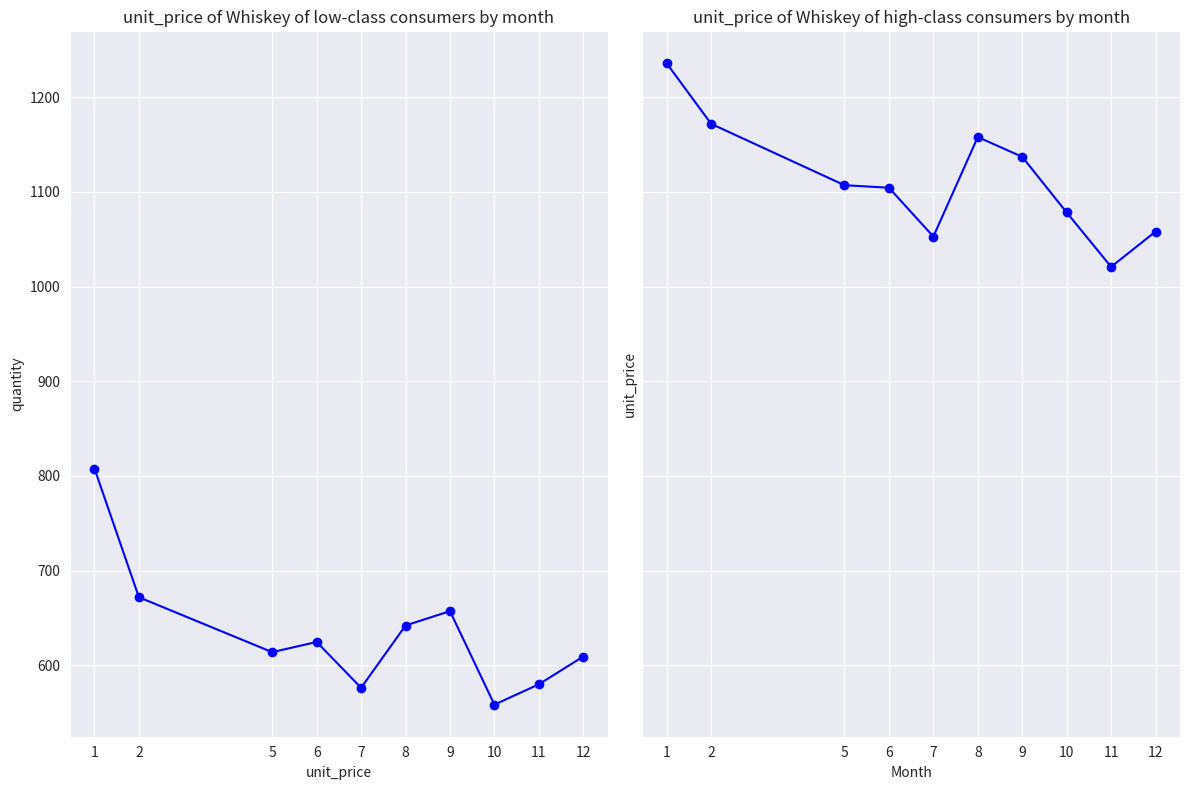

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
axes = axes.flatten()

filtered_df1 = dflowpriceV.groupby('month').agg({"amount":"sum","unit_price":"mean","quantity":"mean"})
axes[0].plot(filtered_df1.index, filtered_df1['unit_price'], marker='o', linestyle='-', color='b')
axes[0].set_title("unit_price of Whiskey of low-class consumers by month")
axes[0].set_xticks(filtered_df1.index)  # 设置 x 轴刻度为 'month' 的索引值
axes[0].grid(True)
axes[0].set_xlabel("unit_price")
axes[0].set_ylabel("quantity")


filtered_df = dfhighpriceV.groupby('month').agg({"amount":"sum","unit_price":"mean","quantity":"mean"})
axes[1].plot(filtered_df.index, filtered_df['unit_price'], marker='o', linestyle='-', color='b')
axes[1].set_title("unit_price of Whiskey of high-class consumers by month")
axes[1].set_xticks(filtered_df.index)  # 设置 x 轴刻度为 'month' 的索引值
axes[1].grid(True)
axes[1].set_xlabel("Month")
axes[1].set_ylabel("unit_price")


plt.tight_layout()
plt.show()

看來在1月大家都喜歡買單價特別高的酒，原因可能是天氣寒冷。若從消費能力面來看，跟年終獎金發下來有關嗎？

## Section 3